Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [289]:
NAME = "Pedro"
COLLABORATORS = "Barbara Machado, Fellipe Couto, Gabriel da Silva"

---

# CS110 Fall 2020 - Assignment 3
# Trie trees

**Fell free to add more cells to the ones always provided in each question to expand your answers, as needed. Make sure to refer to the [CS110 course guide](https://drive.google.com/file/d/1NUeMvAiGGMjif8IgLZjvwvwwzjBEx9Q0/view?pli=1) on the grading guidelines, namely how many HC identifications and applications you are expected to include in each assignment.**

Throughout the assignment, key **"checklist items"** you have to implement or answer are bolded, while *hints* and other interesting accompanying notes are written in italics to help you navigate the text.

If you have any questions, do not hesitate to reach out to the TAs in the Slack channel "#cs110-algo-f20", or come to one of your instructors' OHs.

### Submission Materials
Your assignment submission needs to include the following resources:
1. A PDF file must be the first resource and it will be created from the Jupyter notebook template provided in these instructions. Please make sure to use the same function names as the ones provided in the template. If your name is “Dumbledore”, your PDF should be named “Dumbledore.pdf”.
2. Your second resource must be a single Python/Jupyter Notebook named “Dumbledore.ipynb”. You can also submit a zip file that includes your Jupyter notebook, but please make sure to name it “Dumbledore.zip” (if your name is Dumbledore!).

## Question 0 [#responsibility]

Take a screenshot of your CS110 dashboard on Forum where the following is visible:
* your name.
* your absences for the course have been set to excused up to the end of week 9 (inclusively).

This will be evidence that you have submitted acceptable pre-class and make-up work
for a CS110 session you may have missed. Check the specific CS110 make-up and
pre-class policies in the syllabus of the course.

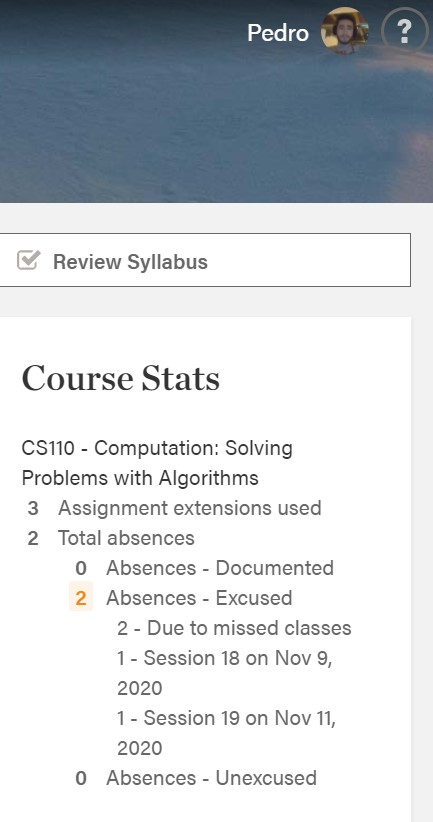

In [290]:
from IPython.display import Image
Image(filename="proof3.JPG")

## Overview

Auto-completion functionalities are now ubiquitous in search engines, document editors, and messaging apps. How would you go about developing an algorithmic strategy to implement these computational solutions? In this assignment, you will learn about a new data structure and use it to build an auto-complete engine. Each question in the assignment guides you closer to that objective while encouraging you to contrast this novel data structure to the other ones we have discussed in class.

A [trie tree](https://en.wikipedia.org/wiki/Trie), or a prefix tree, is a common data structure that stores a set of strings in a collection of nodes so that all strings with a common prefix are found in the same branch of the tree. Each node is associated with a letter, and as you traverse down the tree, you pick up more letters, eventually forming a word. Complete words are commonly found on the leaf nodes. However, some inner nodes can also mark full words.

Let’s use an example diagram to illustrate several important features of tries:

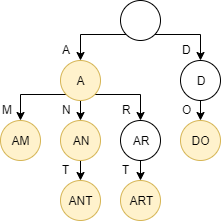

- Nodes that mark valid words are marked in yellow. Notice that while all leaves are considered valid words, only some inner nodes contain valid words, while some remain only prefixes to valid words appearing down the branch.

- The tree does not have to be balanced, and the height of different branches depends on its contents.

- In our implementation, branches never merge to show common suffixes (for example, both ANT and ART end in T, but these nodes are kept separate in their respective branches). However, this is a common first line of memory optimization for tries.

- The first node contains an empty string; it “holds the tree together.”

Your task in this assignment will be to implement a functional trie tree. You will be able to insert words into a dictionary, lookup valid and invalid words, print your dictionary in alphabetical order, and suggest appropriate suffixes like an auto-complete bot.

The assignment questions will guide you through these tasks one by one. To stay safe from breaking your own code, and to reinforce the idea of code versioning, under each new question first **copy your previous (working) code**, and only then **implement the new feature**. The code skeletons provided throughout will make this easier for you at the cost of repeating some large portions of code.

## Q1: Implement a trie tree [#PythonProgramming, #CodeReadability, #DataStructures]

In this question, you will write Python code that can take a set/list/tuple of strings and insert them into a trie tree and lookup whether a specific word/string is present in the trie tree.

### Q1a: Theoretical pondering

Two main approaches to building trees, you might recall from class, are making separate Tree and Node classes, or only making a Node class. Which method do you think is a better fit for trie trees, and why? Justify your reasoning in around 100 words.

For the trie trees, I believe that a mixture of both would be better. We can use the Node class to create and give attributes to the nodes of the trie. And use the Tree class to store and organize these nodes more effectively. One advantage of this is having easy access to the root of the trie while still keeping specific attributes for every node. We also use the tree class to define the methods, so it is easier to work with the tries attributes while still having the nodes stored in the trie.

### Q1b: Practical implementation

*However, as often happens in the life of a software engineer, the general structure of code has already been determined for you. (The reasons this commonly happens are beyond the scope of this assignment, but they could include someone having written tests for you in a [TDD environment](https://en.wikipedia.org/wiki/Test-driven_development) which have a specific structure, or the need to comply with an older codebase.)*

Specifically, **implement a Node class**, which will store the information relevant to each of the trie nodes. It doesn’t have to include any methods, but you will likely find out several attributes that are necessary for a successful implementation.

Alongside this **create a Trie class**, which will represent the tree as a whole. Upon its initiation, the Trie class will create the root Node of the trie.

For the Trie class, write **insert()** and **lookup()** methods, which will insert a word into the trie tree and look it up, respectively. Use the code skeleton below and examine the specifications of its docstrings to guide you on the details of inputs and outputs to each method.

Finally, make sure that the trie can be **initiated with a wordbank as an input**. This means that a user can create a trie and feed it an initial dictionary of words (e.g. trie = Trie(wordlist)), which will be automatically inserted into the trie upon its creation. Likely, this will mean that your __init__() has to make some calls to your insert().

Several test cases have been provided for your convenience and these include some, but not all, possible edge cases. If the implementation is correct, your code will pass all the tests. In addition, create at least **three more tests** to demonstrate that your code is working correctly and justify why such test cases are appropriate.

Use as many code cells on this as you deem necessary. The first cell with the docstrings is locked to prevent accidental deletion.

In [291]:
class Node_Q1:
    """This class represents one node of a trie tree.
    
    Parameters
    ----------
    The parameters for the Node class are not predetermined.
    However, you will likely need to create one or more of them.
    """

    def __init__(self, data = None, parent = None):
        
        self.data = data #value
        self.parent = parent #parent 
        self.children = [] #children
        self.word_end = False  #check if it is the end of a word
        
class Trie_Q1:
    """This class represents the entirety of a trie tree.
    
    Parameters
    ----------
    The parameters for Trie's __init__ are not predetermined.
    However, you will likely need one or more of them.    
    
    Methods
    -------
    insert(self, word)
        Inserts a word into the trie, creating nodes as required.
    lookup(self, word)
        Determines whether a given word is present in the trie.
    """
    def __init__(self, word_list = None):
        """Creates the Trie instance, inserts initial words if provided.
        
        Parameters
        ----------
        word_list : list
            List of strings to be inserted into the trie upon creation.
        """
        self.word_list = word_list  #list of words
        self.root = Node_Q1()  #empty node as root
        
        if word_list:   #if there is a list 
            self.insert_word_list()  #insert the words in the trie
    
    def insert(self, word): 
        """Inserts a word into the trie, creating missing nodes on the go.
        
        Parameters
        ----------
        word : str
            The word to be inserted into the trie.
        """
        word = word.lower()  #makes all the letters lower-case
        current = self.root   #current node is the root
        for letter in word:   #iterate through the word
            #checking if the current letter exists in the current node children 
            hasLetter = None  
            for child in current.children:
                #if the letter is found
                if letter == child.data:
                    hasLetter = child  #stores the node
                    break  #stop looking for the letter
            #if the letter is in the children        
            if hasLetter is not None:
                current = hasLetter  #current update
            else:
                newLetter = Node_Q1(data=letter,parent=current)  #create new node for the letter
                current.children.append(newLetter)  #append the node to the children 
                current = newLetter   #current update
                
        current.word_end = True    #when its the last letter, set it to be the end of a word
                
    def insert_word_list(self):
        """inserts all the words in the word list in the trie.
        
        Parameters
        ----------
        None
            
        Returns
        -------
        None
        """
        for word in self.word_list:
            self.insert(word)
                    
    def lookup(self, word):
        """Determines whether a given word is present in the trie.
        
        Parameters
        ----------
        word : str
            The word to be looked-up in the trie.
            
        Returns
        -------
        bool
            True if the word is present in trie; False otherwise.
            
        Notes
        -----
        Your trie should ignore whether a word is capitalized.
        E.g. trie.insert('Prague') should lead to trie.lookup('prague') = True
        """
        word = word.lower()   #makes all the letters lower-case 
        current = self.root     #current node is the root
        for letter in word:     #iterate through the word
            #checking if the current letter exists in the current node children
            hasLetter = None
            for child in current.children:
                #if the letter is found
                if letter == child.data:
                    hasLetter = child    #stores the node
                    break
            #if the letter is in the children
            if hasLetter is not None:
                current = hasLetter  #current update
            else:
                return False
        
        #checks if it is a prefix or a word
        if current.word_end:
            return True
        else:
            return False

In [292]:
# Here are several tests that have been created for you.
# Remeber that the question asks you to provide several more,
# as well as justify them.

# This is Namárië, JRRT's elvish poem written in Quenya
wordbank = "Ai! laurië lantar lassi súrinen, yéni unótimë ve rámar aldaron! Yéni ve lintë yuldar avánier mi oromardi lisse-miruvóreva Andúnë pella, Vardo tellumar nu luini yassen tintilar i eleni ómaryo airetári-lírinen. Sí man i yulma nin enquantuva? An sí Tintallë Varda Oiolossëo ve fanyar máryat Elentári ortanë, ar ilyë tier undulávë lumbulë; ar sindanóriello caita mornië i falmalinnar imbë met, ar hísië untúpa Calaciryo míri oialë. Sí vanwa ná, Rómello vanwa, Valimar! Namárië! Nai hiruvalyë Valimar. Nai elyë hiruva. Namárië!".replace("!", "").replace("?", "").replace(".", "").replace(",", "").replace(";", "").split()
trie = Trie_Q1(wordbank)
assert trie.lookup('oiolossëo') == True  # be careful about capital letters!
assert trie.lookup('an') == True  # this is a prefix, but also a word in itself
assert trie.lookup('ele') == False  # this is a prefix, but NOT a word
assert trie.lookup('Mithrandir') == False  # not in the wordbank

In [293]:
assert trie.lookup('oiolosseo') == False  # same word but without the sign
assert trie.lookup('AN') == True  # word present with all upper case
assert trie.lookup('ELE') == False  # word present with all upper case

## Q2: The computational complexity of tries [#ComplexityAnalysis, #DataStructures]

Evaluate the **computational complexity of the insert() and lookup()** methods in a trie. What are the relevant variables for runtime? You might want to consider how the height of a trie is computed to start addressing this question.  Make sure to clearly explain your reasoning.

**Compare your results to** the runtime of the same operations on **a BST**. Can you think of specific circumstances where the practical runtimes of operations supported by tries are higher than for BSTs? Explain your answer. If you believe such circumstances could be common, why would someone even bother implementing a trie tree?

To analyze the complexity of the insert method we need to look mainly at 3 lines of code, and for this, I'm going to say that W = size of the word and C = size of the list of children: 

    word = word.lower()  
        
        This line has to go through the whole word to make sure that it is lower-case, so it has a time complexity of O(T).

    for letter in word:
    
        This one iterates through the word, so it also has a time complexity of O(t).
    
    for child in current.children:
    
        This last line is nested in the previous line and it iterates through the list of children, so it has a time complexity of O(C).
        
Putting them together, we have that the total complexity is O(T) + O(T*C), we can, however, neglect O(T) since we are adding it to O(T*C), so our final time complexity would be O(T*C).

For the lookup function, we have the same structure as the insert function, except for a few changes in some lines that have constant complexity, so our time complexity for lookup is also O(T*C).

These same operations, for the BST, have a time complexity of O(H), where H is the height of the tree and it can vary from log(n) (balanced tree) to n (completely unbalanced tree).

Comparing the 2 is hard and kind of pointless since they have very different applications. However, if we need to make a comparison we can say that BST scales with n, which can go all the way to infinity, but a trie scales with T and C which have a limit on how big they can get. T is only as big as the biggest word in your database (the longest word in the English language, for example, is 45 letters long), and C is only as big as the number of different characters in your database. So, for practical usage, the operation in a trie scale to a limit, while the same ones for BST scale to infinity.

## Q3: Print a dictionary in alphabetical order. [#PythonProgramming, #CodeReadability]

Recall the meaning of pre-order traversal from your previous classes. On the data structure of a trie tree, pre-order traversal corresponds to an alphabetically sorted list of the words contained within (provided that your node children are sorted alphabetically). Copy your existing code to the code skeleton cell below, and add a new method to it, **preorder_traversal()**. This will be version two of your autocomplete script.

The method should **return a list**, whose elements will be the words contained in the tree, in alphabetical order. On top of passing the provided test, write at least **three more tests**, and explain why they are appropriate.

**Approach choice:** Remember the two possible approaches to the problem, as we’ve seen at the start of the course: iterative or recursive. Depending on your trie implementation, one might be preferred over the other. **Justify your choice of approach** in a few sentences (~100 words).

Copy-paste your previous code and make adjustments to this "new version", so that you cannot break the old one :). The first cell has been locked to stop you from accidentally deleting the docstrings. Please code below.

*(Hint: If you choose a recursive approach, it might be useful to implement a helper method that is not called by the user but by preorder_traversal().)*

In [300]:
class Node_Q3:
    """This class represents one node of a trie tree.
    
    Parameters
    ----------
    The parameters for the Node class are not predetermined.
    However, you will likely need to create one or more of them.
    """

    def __init__(self, data = None, parent = None):
        
        self.data = data
        self.parent = parent
        self.children = []
        self.word_end = False
        
class Trie_Q3:
    """This class represents the entirety of a trie tree.
    
    Parameters
    ----------
    The parameters for Trie's __init__ are not predetermined.
    However, you will likely need one or more of them.    
    
    Methods
    -------
    insert(self, word)
        Inserts a word into the trie, creating nodes as required.
    lookup(self, word)
        Determines whether a given word is present in the trie.
    """
    def __init__(self, word_list = None):
        """Creates the Trie instance, inserts initial words if provided.
        
        Parameters
        ----------
        word_list : list
            List of strings to be inserted into the trie upon creation.
        """
        self.word_list = word_list  #list of words
        self.root = Node_Q1()  #empty node as root
        
        if word_list:   #if there is a list 
            self.insert_word_list()  #insert the words in the trie
            
    
    def insert(self, word):
        """Inserts a word into the trie, creating missing nodes on the go.
        
        Parameters
        ----------
        word : str
            The word to be inserted into the trie.
        """
        word = word.lower()  #makes all the letters lower-case
        current = self.root   #current node is the root
        for letter in word:   #iterate through the word
            #checking if the current letter exists in the current node children 
            hasLetter = None  
            for child in current.children:
                #if the letter is found
                if letter == child.data:
                    hasLetter = child  #stores the node
                    break  #stop looking for the letter
            #if the letter is in the children        
            if hasLetter is not None:
                current = hasLetter  #current update
            else:
                newLetter = Node_Q3(data=letter,parent=current)  #create new node for the letter
                current.children.append(newLetter)  #append the node to the children
                current.children.sort(key=lambda x: x.data)  #sorts the list of children in alphabetical order
                current = newLetter   #updates current
                
        current.word_end = True   #when its the last letter, set it to be the end of a word
        
                
    def insert_word_list(self):
        """inserts all the words in the word list in the trie.
        
        Parameters
        ----------
        None
            
        Returns
        -------
        None
        """
        for word in self.word_list:
            self.insert(word)
            
    
    def preorder_traversal(self,root,wordsInOrder = []):
        """Delivers the content of the trie in alphabetical order.

        The method should both print the words out and return them in a list.
        You can create other methods if it helps you,
        but the tests should use this one.
        
        Returns
        ----------
        list
            List of strings, all words from the trie in alphabetical order.
        """
        current = root #current node is the root
        if current.children != []:  #base case (when current node has no children)
            for child in current.children:  #iterate through currents children
                if child.word_end:  #checks if the child is the end of a word
                    letter = child   #stores the child node in the var letter
                    word = ''   #initializing the word
                    while letter.parent is not None:   #goes up in the trie until it reaches the root
                        word += letter.data   #appends the letter in the word
                        letter = letter.parent   #updates the letter
                    word = word[::-1]  #since we climbed up the trie, we need to invert the word
                    wordsInOrder.append(word)  #append the word to the list
                self.preorder_traversal(child,wordsInOrder) # recursivelly calls the the function again using the child as the root
        return wordsInOrder   

In [295]:
wordbank = "Lorem ipsum dolor sit amet, consectetuer adipiscing elit. Duis pulvinar. Class aptent taciti sociosqu ad litora torquent per conubia nostra, per inceptos hymenaeos. Nunc dapibus tortor vel mi dapibus sollicitudin. Etiam quis quam. Curabitur ligula sapien, pulvinar a vestibulum quis, facilisis vel sapien.".replace(",", "").replace(".", "").split()

trie = Trie_Q3(wordbank)
assert trie.preorder_traversal(trie.root) == ['a','ad','adipiscing','amet','aptent','class','consectetuer','conubia','curabitur','dapibus','dolor','duis','elit','etiam','facilisis','hymenaeos','inceptos','ipsum','ligula','litora','lorem','mi','nostra','nunc','per','pulvinar','quam','quis','sapien','sit','sociosqu','sollicitudin','taciti','torquent','tortor','vel','vestibulum']

Please re-run the big code cell that defines the classes for q3 before every test in this question.

In [297]:
#testing for numbers
wordbank2 = "33 is larger than 20, but smaller than 57.".replace(",", "").replace(".", "").split()

trie2 = Trie_Q3(wordbank2)
assert trie2.preorder_traversal(trie2.root) == ['20', '33', '57', 'but', 'is', 'larger', 'smaller', 'than']

In [299]:
#testing for signs and letters outside of the english language
wordbank3 = "Avião sem asa, garrafa sem cachaça.".replace(",", "").replace(".", "").split()

trie3 = Trie_Q3(wordbank3)
assert trie3.preorder_traversal(trie3.root) == ['asa', 'avião', 'cachaça', 'garrafa', 'sem']

In [301]:
#testing for hebrew (writen from the right to the left). Note that the order of the list is also from the right to the left
wordbank4 = "נמאס לי לחשוב על מבחנים".split()

trie4 = Trie_Q3(wordbank4)
assert trie4.preorder_traversal(trie4.root) == ['לחשוב', 'לי', 'מבחנים', 'נמאס', 'על']

I chose to do a mixed approach on this one. It has elements of iteration, but it is a mainly recursive method. I chose to iterate through the list of children since we know the end of it and we can easily and intuitively get the values in the list. However, for the main application, I chose recursion, since we don't know exactly the height of our three and how many leaves we have. This was we can just set up a base case and continue our recursion until the base case, making it easy to go through the nodes. 

## Q4: Find the k most common words in a speech. [#PythonProgramming, #CodeReadability]

To mathematically determine the overall connotation of a speech, you might want to compute which words are most frequently used and then run a [sentiment analysis](https://en.wikipedia.org/wiki/Sentiment_analysis). To this end, add a method to your code, **k_most_common()** that will take as an input k, an integer, and return a list of the k most common words from the dictionary within the trie. The structure of the output list should be such that each entry is a tuple, the first element being the word and the second an integer of its frequency (see docstring if you’re confused).

To complete this exercise, you don’t have to bother with resolving ties (for example, if k = 1, but there are two most common words with the same frequency, you can return either of them), but consider it an extra challenge and let us know if you believe you managed to solve it.

The test cell below downloads and preprocesses several real-world speeches, and then runs the k-most-common word analysis of them; your code should pass the tests. As usual, add at least **three more tests**, and justify why they are relevant to your code (feel free to find more speeches to start analysing too!).

Again, copy-paste your previous code and make adjustments to this "new version". The first cell has been locked to stop you from accidentally deleting the docstrings.

Completing this question well will help you to tackle Q5!

*(Hint: This task will probably require your nodes to store more information about the frequency of words inserted into the tree. One data structure that might be very useful to tackle the problem of traversing the tree and finding most common words is heaps — you are allowed to use the heapq library or another alternative for this task.)*

In [302]:
class Node_Q4:
    """This class represents one node of a trie tree.
    
    Parameters
    ----------
    The parameters for the Node class are not predetermined.
    However, you will likely need to create one or more of them.
    """

    def __init__(self, data = None, parent = None, count = 0):
        
        self.data = data
        self.parent = parent
        self.children = []
        self.word_end = False
        self.word_count = count
        
class Trie_Q4:
    """This class represents the entirety of a trie tree.
    
    Parameters
    ----------
    The parameters for Trie's __init__ are not predetermined.
    However, you will likely need one or more of them.    
    
    Methods
    -------
    insert(self, word)
        Inserts a word into the trie, creating nodes as required.
    lookup(self, word)
        Determines whether a given word is present in the trie.
    """
    def __init__(self, word_list = None):
        """Creates the Trie instance, inserts initial words if provided.
        
        Parameters
        ----------
        word_list : list
            List of strings to be inserted into the trie upon creation.
        """
        self.word_list = word_list
        self.root = Node_Q4()
        
        if word_list:
            self.insert_word_list()
    
    def insert(self, word):
        """Inserts a word into the trie, creating missing nodes on the go.
        
        Parameters
        ----------
        word : str
            The word to be inserted into the trie.
        """
        word = word.lower()  #makes all the letters lower-case
        current = self.root   #current node is the root
        for letter in word:   #iterate through the word
            #checking if the current letter exists in the current node children 
            hasLetter = None  
            for child in current.children:
                #if the letter is found
                if letter == child.data:
                    hasLetter = child  #stores the node
                    break  #stop looking for the letter
            #if the letter is in the children        
            if hasLetter is not None:
                current = hasLetter  #current update
            else:
                newLetter = Node_Q4(data=letter,parent=current)  #create new node for the letter
                current.children.append(newLetter)  #append the node to the children
                current.children.sort(key=lambda x: x.data)  #sorts the list of children in alphabetical order
                current = newLetter   #updates current
                
        current.word_end = True   #when its the last letter, set it to be the end of a word      
        current.word_count += 1    #increasses the word count    
        
                
    def insert_word_list(self):
        """inserts all the words in the word list in the trie.
        
        Parameters
        ----------
        None
            
        Returns
        -------
        None
        """
        for word in self.word_list:
            self.insert(word)

    
    def list_of_repetitions(self, root, wordsInOrder=[]):
        """give a list of al the words in the trie and how many times they repeated
        
        Parameters
        ----------
        Node - root
        
        List of tupples - wordsInOrder
            
        Returns
        -------
        List of tupples
        """
        
        #This works the same way as the pre_order_traversal method from q3, but when I append the word, I also append the word count
        current = root
        if current.children != []:
            for child in current.children:
                if child.word_end:
                    letter = child
                    word = ''
                    while letter.parent is not None:
                        word += letter.data
                        letter = letter.parent
                    word = word[::-1]
                    wordsInOrder.append((word, child.word_count))
                self.list_of_repetitions(child,wordsInOrder)
        return wordsInOrder
    
    
    def k_most_common(self, k):
        """Finds k words inserted into the trie most often.

        You will have to tweak some properties of your existing code,
        so that it captures information about repeated insertion.

        Parameters
        ----------
        k : int
            Number of most common words to be returned.

        Returns
        ----------
        list
            List of tuples.
            
            Each tuple entry consists of the word and its frequency.
            The entries are sorted by frequency.

        Example
        -------
        >>> print(trie.k_most_common(3))
        [(‘the’, 154), (‘a’, 122), (‘i’, 122)]
        
        This means that the word ‘the’ has appeared 154 times in the inserted text.
        The second and third most common words both appeared 122 times.
        """
        completeList = self.list_of_repetitions(self.root, wordsInOrder=[])   #get the whole list of words and word counts
        completeList.sort(key=lambda tup: tup[1], reverse=True)   #sorts the list according to the second element of te tupple (word count) 
        return completeList[0:k]    #returns the first k elements of the list

In [303]:
# Mehreen Faruqi - Black Lives Matter in Australia: https://bit.ly/CS110-Faruqi
# John F. Kennedy - The decision to go to the Moon: https://bit.ly/CS110-Kennedy
# Martin Luther King Jr. - I have a dream: https://bit.ly/CS110-King
# Greta Thunberg - UN Climate Summit message: https://bit.ly/CS110-Thunberg
# Vaclav Havel - Address to US Congress after the fall of Soviet Union: https://bit.ly/CS110-Havel

# you might have to pip install urllib before running this cell
# since you're downloading data from online, this might take a while to run
import urllib.request
speakers = ['Faruqi', 'Kennedy', 'King', 'Thunberg', 'Havel']
bad_chars = [';', ',', '.', '?', '!', '_', '[', ']', ':', '“', '”', '"', '-', '-']

for speaker in speakers:
    speech = urllib.request.urlopen(f'https://bit.ly/CS110-{speaker}')
    
    trie = Trie_Q4()

    for line in speech:
        line = line.decode(encoding = 'utf-8')
        line = filter(lambda i: i not in bad_chars, line)
        words = "".join(line).split()
        for word in words:
            trie.insert(word)
 
    if speaker == 'Faruqi':
        assert trie.k_most_common(20) == [('the', 60), ('and', 45), ('to', 39), ('in', 37), ('of', 34), ('is', 25), ('that', 22), ('this', 21), ('a', 20), ('people', 20), ('has', 14), ('are', 13), ('for', 13), ('we', 13), ('have', 12), ('racism', 12), ('black', 11), ('justice', 9), ('lives', 9), ('police', 9)]
    elif speaker == 'Kennedy':
        assert trie.k_most_common(21) == [('the', 117), ('and', 109), ('of', 93), ('to', 63), ('this', 44), ('in', 43), ('we', 43), ('a', 39), ('be', 30), ('for', 27), ('that', 27), ('as', 26), ('it', 24), ('will', 24), ('new', 22), ('space', 22), ('is', 21), ('all', 15), ('are', 15), ('have', 15), ('our', 15)]
    elif speaker == 'Havel':
        assert trie.k_most_common(22) == [('the', 34), ('of', 23), ('and', 20), ('to', 15), ('in', 13), ('a', 12), ('that', 12), ('are', 9), ('we', 9), ('have', 8), ('human', 8), ('is', 8), ('you', 8), ('as', 7), ('for', 7), ('has', 7), ('this', 7), ('be', 6), ('it', 6), ('my', 6), ('our', 6), ('world', 6)]
    elif speaker == 'King':
        assert trie.k_most_common(23) == [('the', 103), ('of', 99), ('to', 59), ('and', 54), ('a', 37), ('be', 33), ('we', 29), ('will', 27), ('that', 24), ('is', 23), ('in', 22), ('as', 20), ('freedom', 20), ('this', 20), ('from', 18), ('have', 17), ('our', 17), ('with', 16), ('i', 15), ('let', 13), ('negro', 13), ('not', 13), ('one', 13)]
    elif speaker == 'Thunberg':
        assert trie.k_most_common(24) == [('you', 22), ('the', 20), ('and', 16), ('of', 15), ('to', 14), ('are', 10), ('is', 9), ('that', 9), ('be', 8), ('not', 7), ('with', 7), ('i', 6), ('in', 6), ('us', 6), ('a', 5), ('how', 5), ('on', 5), ('we', 5), ('all', 4), ('dare', 4), ('here', 4), ('my', 4), ('people', 4), ('will', 4)]

In [304]:
# empty trie tree 
test1 = Trie_Q4()
assert test1.k_most_common(10) == []

# words with same frequency (shold give alphabetical order)
test2 = Trie_Q4(["orthogonal","lol","banana"])
assert test2.k_most_common(2) == [('banana', 1), ('lol', 1)]

# inputs with diffent capitalization and numbers
test3 = Trie_Q4(['wow', 'Wow', 'wOW', 'FA50', '50fA'])
assert test3.k_most_common(4) == [('wow', 3), ('50fa', 1), ('fa50', 1)]

## Q5: Implement an autocomplete with a Shakespearean dictionary! [#PythonProgramming, #CodeReadability]

This is by itself the most difficult coding question of the assignment, but completing Q4 thoroughly should lay a lot of the groundwork for you already.

Your task is to create a new **autocomplete()** method for your class, which will take a string as an input, and return another string as an output. If the string is not present in the tree, the output will be the same as the input. However, if the string is present in the tree, your task is to find the most common word to which it is a prefix and return that word instead (this can still turn out to be itself).

To make the task more interesting, use the test cell code to download and parse “The Complete Works of William Shakespeare”, and insert them into a trie. Your autocomplete should then pass the following tests. As usual, add at least **three more test cases**, and explain why they are appropriate (you can use input other than Shakespeare for them).

Make sure to include a minimum **100 word-summary critically evaluating** your autocomplete engine.

*(Hint: Again, depending on how you choose to implement it, your autocomplete() might make calls to other helper methods. However, make sure that autocomplete() is the method exposed to the user in order to pass the tests.)*

*This is a thoroughly frequentist approach to the problem, which is not the only method, and in many cases not the ideal method. However, if you were tasked with implementing something like [this](https://jqueryui.com/autocomplete/) or [this](https://xdsoft.net/jqplugins/autocomplete/), it might just be enough, so let’s give it a go. Good luck!*

In [305]:
class Node_Q5:
    """This class represents one node of a trie tree.
    
    Parameters
    ----------
    The parameters for the Node class are not predetermined.
    However, you will likely need to create one or more of them.
    """

    def __init__(self, data = None, parent = None, count = 1):
        
        self.data = data
        self.parent = parent
        self.children = []
        self.word_end = False
        self.word_count = count
        self.word_count_end = 0
        
class Trie_Q5:
    """This class represents the entirety of a trie tree.
    
    Parameters
    ----------
    The parameters for Trie's __init__ are not predetermined.
    However, you will likely need one or more of them.    
    
    Methods
    -------
    insert(self, word)
        Inserts a word into the trie, creating nodes as required.
    lookup(self, word)
        Determines whether a given word is present in the trie.
    """
    def __init__(self, word_list = None):
        """Creates the Trie instance, inserts initial words if provided.
        
        Parameters
        ----------
        word_list : list
            List of strings to be inserted into the trie upon creation.
        """
        self.word_list = word_list
        self.root = Node_Q5()
        
        if word_list:
            self.insert_word_list()
    
    def insert(self, word):
        """Inserts a word into the trie, creating missing nodes on the go.
        
        Parameters
        ----------
        word : str
            The word to be inserted into the trie.
        """
        #works the same as the previous insert method from q4, except for line 67
        word = word.lower()
        current = self.root
        for letter in word:
            hasLetter = None
            for child in current.children:
                if letter == child.data:
                    hasLetter = child
                    break
            if hasLetter is not None:
                current = hasLetter
                current.word_count += 1  #increase the counter for how many times this node happened
            else:
                newLetter = Node_Q5(data=letter,parent=current)
                current.children.append(newLetter)
                current.children.sort(key=lambda x: x.data)
                current = newLetter
                
        current.word_count_end += 1       
        current.word_end = True
        
                
    def insert_word_list(self):
        """inserts all the words in the word list in the trie.
        
        Parameters
        ----------
        None
            
        Returns
        -------
        None
        """
        for word in self.word_list:
            self.insert(word)
            
    
    def most_common(self, root):
        """gets the most common word of a trie rooted on a root
        
        Parameters
        ----------
        Node - root
            
        Returns
        -------
        tupple (str,int)
        """
        current = root   #current node is the root
        while (not current.word_end) or current.word_count_end != current.word_count:  #while we dont find an end letter and a leaf.
            most = Node_Q5(count = 0)   #sets the most common child as an empty node of frequency 0
            for child in current.children:    #iterates through the childre of the current node
                if child.word_count > most.word_count:    #checks if the current child is more common than the most common child
                    most = child
            current = most  #updates the current node as the most common child
        letter = current  #stores the last current node
        end_count = letter.word_count   #stores the counter of the last current node
        word = ''  #initializes the word
        
        while letter != root:   #goes up in the trie until it reaches the root
            if not letter.word_end:    #if the letter is not the end of a word
                word += letter.data    #appends the letter in the word
                letter = letter.parent  #updates the letter
            else:   #found the end of a prefix word
                if letter.word_count_end > end_count:   #if the counter of the prefix word is biger than the counter of the word  
                    word = letter.data   #resets the word as the prefix word
                    end_count = letter.word_count_end   #resets the word count as the prefix word count
                    letter = letter.parent  #continues to climb up
                else:  #the prefix word is less common than the word
                    word += letter.data 
                    letter = letter.parent
                    
        if root.word_count_end > end_count: #if the word count of the root node (can be the end of a prefix word) is larger than the word count
            word = ''  #resets the word
            
        if letter.data:
            word += letter.data
        word = word[::-1]  #reverts the word, since we clibed up from the leafs to the root
        return ((word,end_count))
    
    def autocomplete(self, prefix):
        """Finds the most common word with the given prefix.

        You might want to reuse some functionality or ideas from Q4.

        Parameters
        ----------
        prefix : str
            The word part to be “autocompleted”.

        Returns
        ----------
        str
            The complete, most common word with the given prefix.
            
            The return value is equal to prefix if there is no valid word in the trie.
            The return value is also equal to prefix if prefix is the most common word.
        """
        #finds the node that corresponds to last letter of the prefix by climbing down the tree starting at the root
        current = self.root
        cLetterIndex = 0
        while cLetterIndex < len(prefix):
            for child in current.children:
                if child.data == prefix[cLetterIndex]:
                    current = child
                    break
            cLetterIndex += 1
        #uses the most_common method to find the most common word of the sub-trie rooted at the last letter of the prefix.
        root = current
        nextWord = prefix+self.most_common(root)[0][1::]
        return nextWord          

In [306]:
import urllib.request
response = urllib.request.urlopen('http://bit.ly/CS110-Shakespeare')
bad_chars = [';', ',', '.', '?', '!', '1', '2', '3', '4', '5', '6', '7', '8', '9', '0', '_', '[', ']', '"', '&', "'", '(', ')', '{', '}']

trieSH = Trie_Q5()

for line in response:
    line = line.decode(encoding = 'utf-8')
    line = filter(lambda i: i not in bad_chars, line)
    words = "".join(line).split()
    for word in words:
        trieSH.insert(word)

assert trieSH.autocomplete('hist') == 'history'
assert trieSH.autocomplete('en') == 'enter'
assert trieSH.autocomplete('cae') == 'caesar'
assert trieSH.autocomplete('gen') == 'gentleman'
assert trieSH.autocomplete('pen') == 'pen'
assert trieSH.autocomplete('tho') == 'thou'
assert trieSH.autocomplete('pent') == 'pentapolis'
assert trieSH.autocomplete('petr') == 'petruchio'

In [307]:
workbank = ['aabc', 'aabc', 'aabc', 'aacb', 'aacb', 'aacb', '000','000','001']

# word that has similar characters with other words
trieSH1 = Trie_Q5(workbank)
assert trieSH1.autocomplete('aacb') == 'aacb'

# prefix for 2 words with same frequency (should give alphabetical order)
trieSH2 = Trie_Q5(workbank)
assert trieSH2.autocomplete('aa') == 'aabc'

# numbers
trieSH3 = Trie_Q5(workbank)
assert trieSH3.autocomplete('00') == '000'

The engine works, which was the main goal of the assignment. It actually works better than I was anticipating when I first saw the assignment. This is because instead of using the code for question 4 on question 5 which would make it very not inefficient, I used #heuristics, to find the most common word in the sub trie. It would be easy to just use the code for question 4 and go through every node of the trie to find every word and get the most common, but instead, I found the most common word by looking at the most common child of the previous letter of the word. This way instead of having a complexity that scales with the number of nodes, that can go all the way to infinity, we have a function that scales with the size of the word and the number of different characters, which both don't go very high. 

One limitation and possible future implementation of this code, however, is that it can not handle typos. It would be an awesome implementation if I could somehow make the code understand that someone typing "thar" actually meant to type "that". This could possibly be done with a few twists on the code in a way that when going down the tree looking for the word, it stored the "not found" child (the typo) and replaced it with the most common child that is followed by the sub-string that is after the missing letter on the word.

## HCs

#heuristics: I applied this HC on question 5 when thinking of how to find the most common word without having to look at all the words and justifying why this would be a better application.

#breakitdown: I used this HC mainly for question 2, in the complexity analysis. By breaking down the method and analyzing the complexity line by line, it was simpler to get the overall complexity of the method.

#critique: I applied this HC on my summary on question 5 for pointing out limitations for my code and how I could improve it to overcome these limitations.